### 1. Introduction

The project aims to develop a machine learning model that predicts rice yield using rainfall data from a specific region and season, utilizing historical data for training and validation.


Imagine the power of predicting rice yield – the staple food for over half the world – based on something as simple as rainfall data. This project delves into that very possibility, aiming to develop a machine learning model that empowers farmers in a specific region and season to optimize their yields and navigate challenges.

Harnessing the wisdom of past harvests, we'll analyze historical data on rainfall patterns and rice yields, meticulously preparing it for the keen eyes of advanced algorithms. Linear regression, random forests, even deep learning techniques – we'll explore them all, seeking the perfect fit to unveil the hidden relationships between rain and rice.

Think of it as a personalized weather forecast for your crops. Our model will translate rainfall patterns into accurate yield predictions, guiding farmers towards informed decisions on planting dates, resource allocation, and even risk management. Imagine fields buzzing with optimized irrigation, fertilizers applied with surgical precision, and farmers facing the future with newfound confidence.

The impact ripples outwards. Food security bolstered, resource use minimized, and resilience against uncertain weather woven into the very fabric of agricultural practices. This isn't just about predicting rice yield; it's about empowering farmers, revolutionizing agriculture, and ultimately, safeguarding the plates of millions.

### 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

### 3. Data Loading

In [2]:
df = pd.read_csv('data_1.csv')
df.head(3)

,state_name,district_name,year,season,area,production,rainfall,temperature,humidity,sun_hours
0,Bihar,ARARIA,1997,Autumn,17876.0,21397.0,1303.7,27.5,82.0,8.3
1,Bihar,ARARIA,1997,Summer,8479.0,13993.0,1303.7,21.3,69.0,9.1
2,Bihar,ARARIA,1997,Winter,93975.0,121063.0,1303.7,21.3,69.0,9.1


#### 3.1. Data Description

* **State_Name**: This refers to the name of the state in India where the crop is being cultivated. Each state has its own unique climate, soil conditions, and agricultural practices, which can affect the type and yield of crops grown in the area.

* **District_Name**: This refers to the name of the district within a state where the crop is being cultivated. Districts within a state can have varying climate conditions, soil types, and agricultural practices, which can also affect the type and yield of crops grown in the area.

* **Crop_Year**: This refers to the year when the crop was seeded. It is important to track the crop year to understand the seasonality of crop cultivation and its impact on production.

* **Season**: This refers to the season during which the crop is cultivated. In India, there are three rice-growing seasons: autumn, winter (Kharif), and summer. Each season has its own unique climate, soil conditions, and agricultural practices, which can affect the type and yield of crops grown in the area.

* **Crop**: This refers to the specific crop that is being cultivated. In this case, it is rice, which is a crucial crop in India's agriculture sector.

* **Area**: This refers to the amount of land allocated to the crop. It is important to track the area under cultivation to understand the scale of crop production and its impact on overall agricultural production.

* **Production**: This refers to the amount of crop produced. It is crucial to track the production levels to understand the efficiency of crop cultivation and its impact on food security and the agricultural economy.

* **Rainfall**: This refers to the number of rainfall events in a specific region during a specific crop year. Rainfall is a critical factor in rice cultivation, as rice is a rain-fed crop and requires heavy annual rainfall for optimal growth

#### 3.2. Understanding Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state_name     4898 non-null   object 
 1   district_name  4898 non-null   object 
 2   year           4898 non-null   int64  
 3   season         4898 non-null   object 
 4   area           4898 non-null   float64
 5   production     4888 non-null   float64
 6   rainfall       4898 non-null   float64
 7   temperature    4735 non-null   float64
 8   humidity       4832 non-null   float64
 9   sun_hours      4851 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 382.8+ KB


In [4]:
df.describe()

,year,area,production,rainfall,temperature,humidity,sun_hours
count,4898.000000,4898.000000,4.888000e+03,4898.000000,4735.00000,4832.000000,4851.000000
mean,2006.128011,54764.536403,1.026197e+05,1456.455921,25.68196,72.185488,8.978141
std,4.988628,77618.863274,1.833404e+05,671.382936,4.42111,8.466944,0.495374
min,1997.000000,1.000000,1.000000e+00,274.700000,16.40000,0.000000,7.800000
25%,2002.000000,2972.800000,4.823250e+03,1097.100000,21.60000,66.900000,8.600000
50%,2006.000000,20471.500000,2.598450e+04,1303.700000,26.30000,69.800000,9.100000
75%,2010.000000,81385.500000,1.191825e+05,1564.700000,28.50000,79.800000,9.300000
max,2015.000000,687000.000000,1.710000e+06,3489.600000,36.40000,94.200000,10.100000


In [5]:
df.describe(include = 'object')

,state_name,district_name,season
count,4898,4898,4898
unique,9,179,6
top,Bihar,SUPAUL,Kharif
freq,1602,53,1342


In [6]:
df.isnull().sum()

state_name         0
district_name      0
year               0
season             0
area               0
production        10
rainfall           0
temperature      163
humidity          66
sun_hours         47
dtype: int64

In [7]:
print('Duplicated rows: ', df.duplicated().sum())

Duplicated rows:  0


<AxesSubplot: >

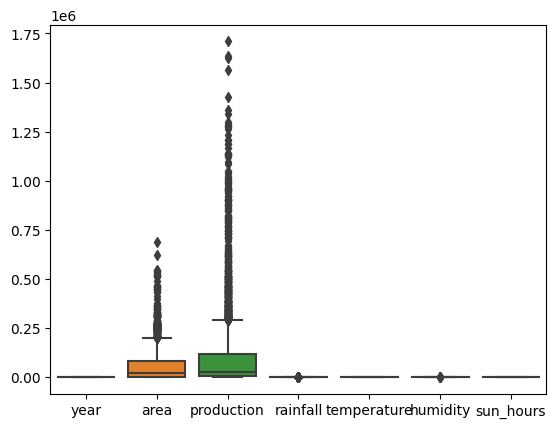

In [8]:
sns.boxplot(df)

C:\Users\U-ser\AppData\Local\Temp\ipykernel_23300\998746758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True)


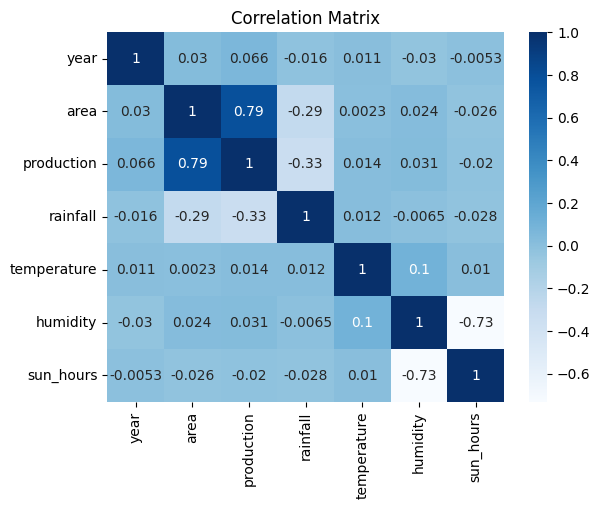

In [9]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

In [10]:
numerical_features = df.select_dtypes(exclude = ['object']).columns.tolist()
print(f'The numerical features: {numerical_features}')

The numerical features: ['year', 'area', 'production', 'rainfall', 'temperature', 'humidity', 'sun_hours']


In [11]:
categorical_features = df.select_dtypes(include = ['object']).columns.tolist()
print(f'The categorical features: {categorical_features}')

The categorical features: ['state_name', 'district_name', 'season']


### 4. Exploratory Data Analysis

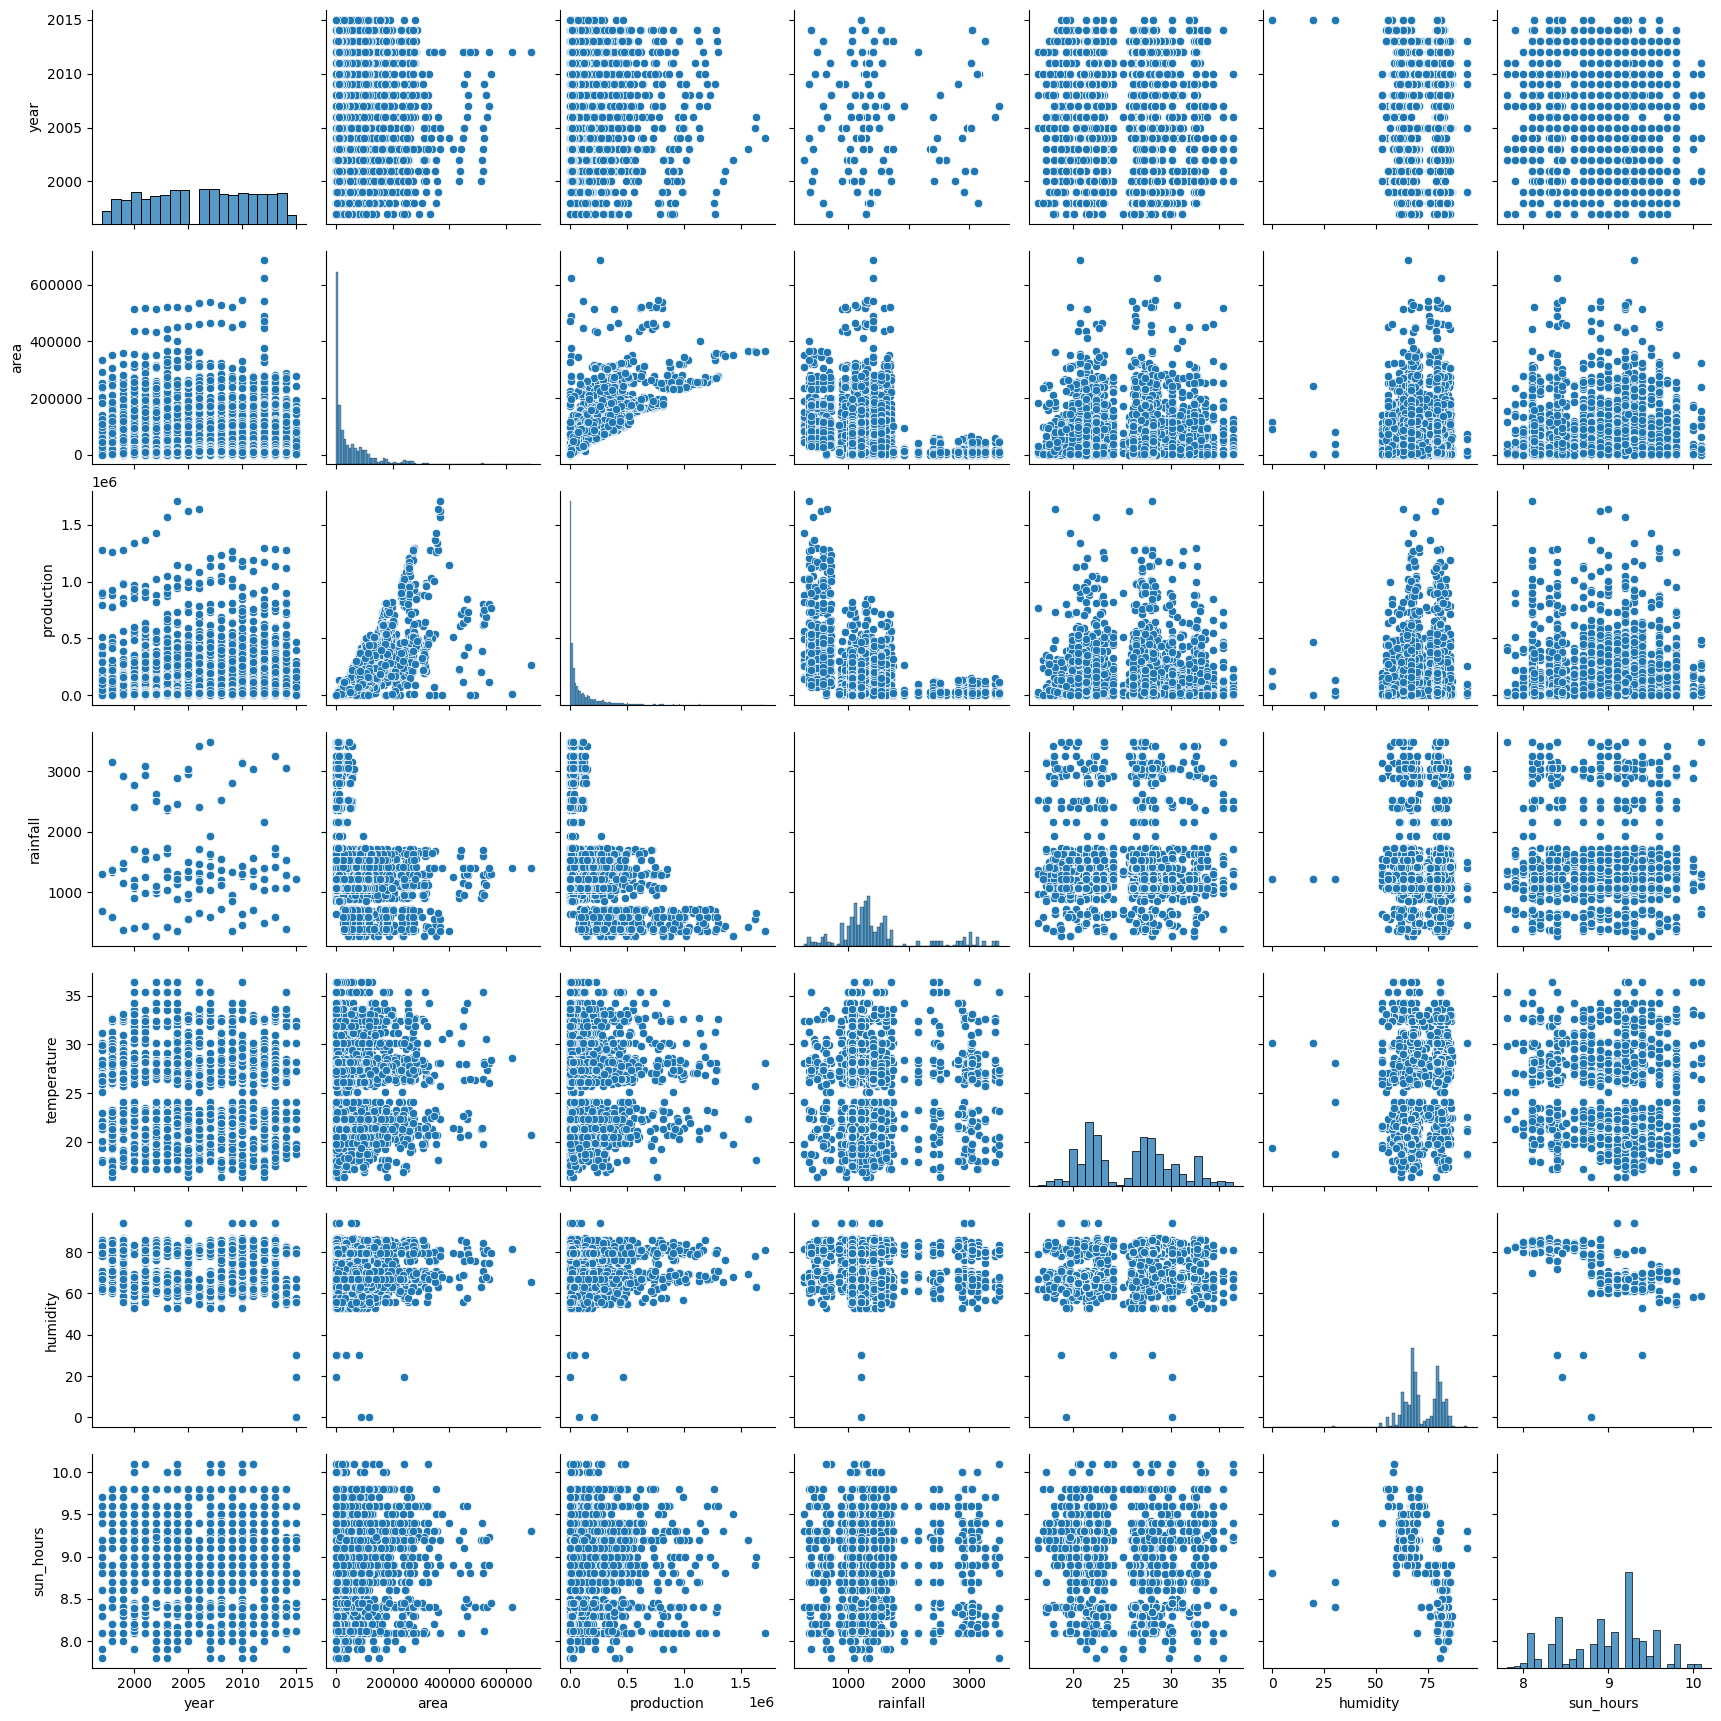

In [12]:
sns.pairplot(df)

#### 4.1. Distribution of State

In [13]:
def count(cols):
    # Set custom color palette
    custom_palette = sns.color_palette("viridis", n_colors=len(df[cols].unique()))

    # Set style
    sns.set(style="whitegrid", font_scale=1.2)

    plt.figure(figsize=(16, 6))

    # Count plot
    plt.subplot(1, 2, 1)
    count_plot = sns.countplot(x=cols, data=df, palette=custom_palette, order=df[cols].value_counts().index)
    plt.title(f'{cols} Distribution', pad=20, fontweight='bold', fontsize=20)
    plt.xticks(rotation=90)

    # for p in count_plot.patches:
    #     count_plot.annotate(format(p.get_height(), '.0f'),
    #                          (p.get_x() + p.get_width() / 2., p.get_height()),
    #                          ha='center', va='center',
    #                          xytext=(0, 9),
    #                          textcoords='offset points')

    # Bar plot
    plt.subplot(1, 2, 2)
    x = pd.DataFrame(df.groupby(cols)['production'].mean().sort_values(ascending = False))
    sns.barplot(x=x.index, y='production', data=x, palette=custom_palette)

    plt.xlabel(f'{cols}', fontsize=14)
    plt.ylabel('Production', fontsize=14)
    plt.title(f'Total Production in {cols}', pad=20, fontweight='bold', fontsize=20)
    plt.xticks(rotation=90)
    plt.show()

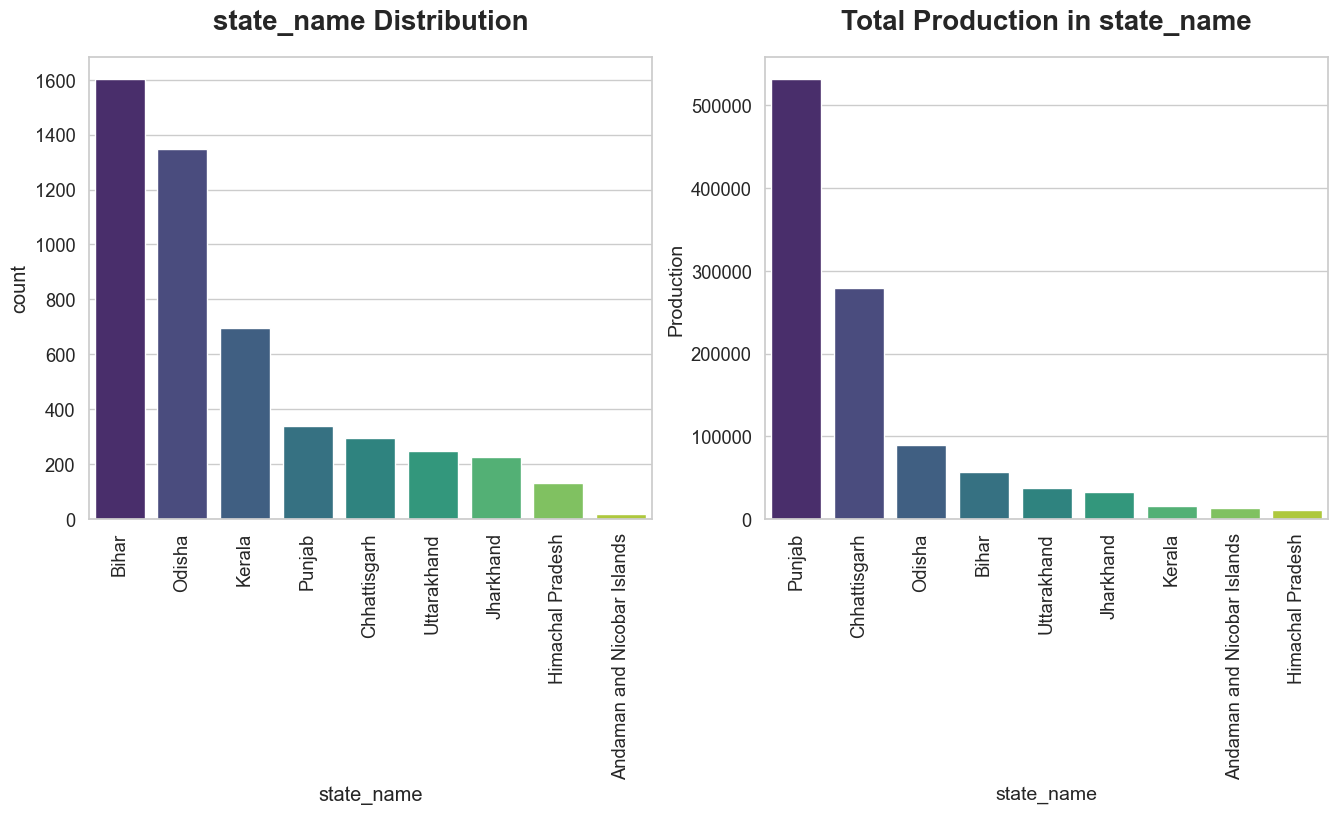

In [14]:
count('state_name')

#### 4.2. Distribution of Year

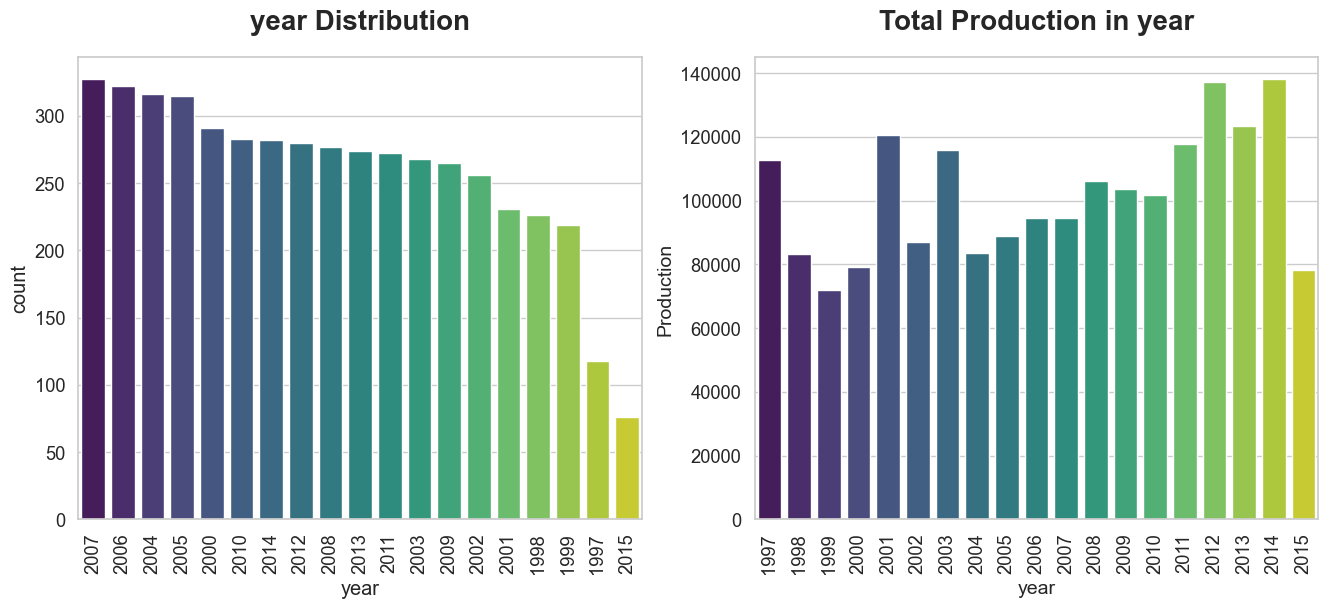

In [15]:
count('year')

#### 4.3. Distribution of Season

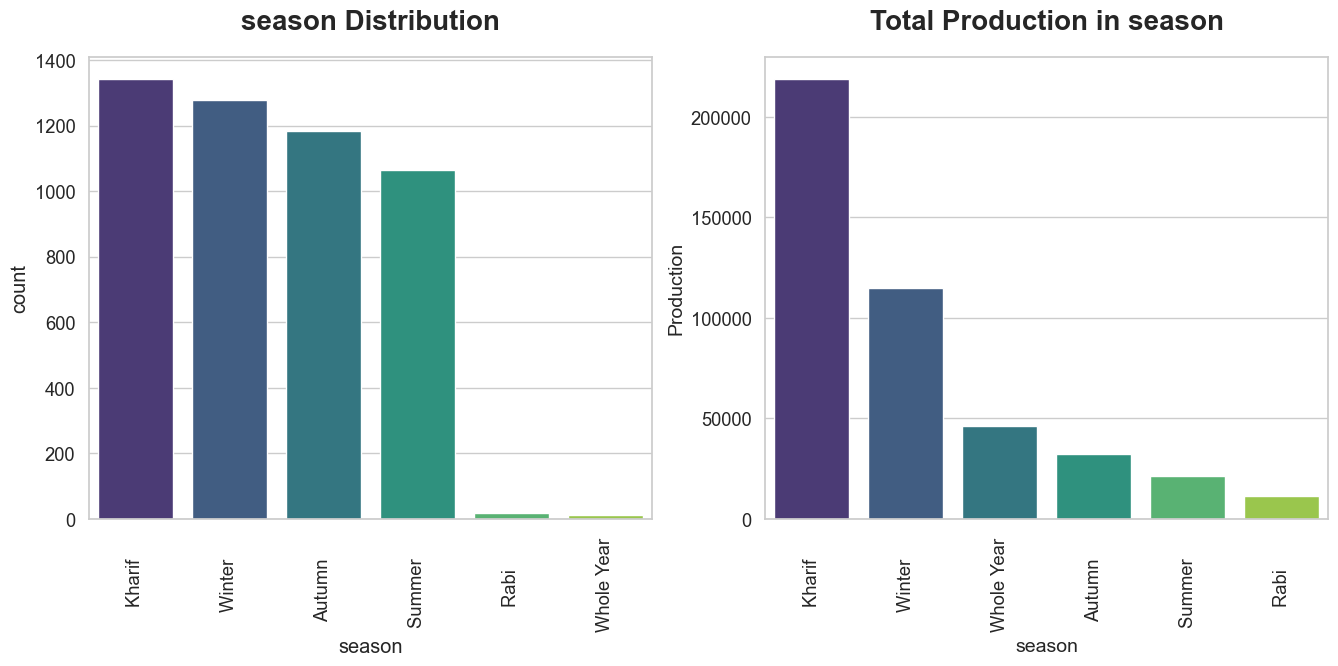

In [16]:
count('season')

#### 4.4. Trend of all features

In [17]:
def count_1(cols):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=cols, y='production', data=df, ci=None)
    plt.xlabel(f'{cols}', fontsize=14)
    plt.ylabel('Production', fontsize=14)
    plt.title(f'Production Over the {cols}', fontsize=18, fontweight='bold', pad=20)
    plt.show()

C:\Users\U-ser\AppData\Local\Temp\ipykernel_23300\542182250.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=cols, y='production', data=df, ci=None)


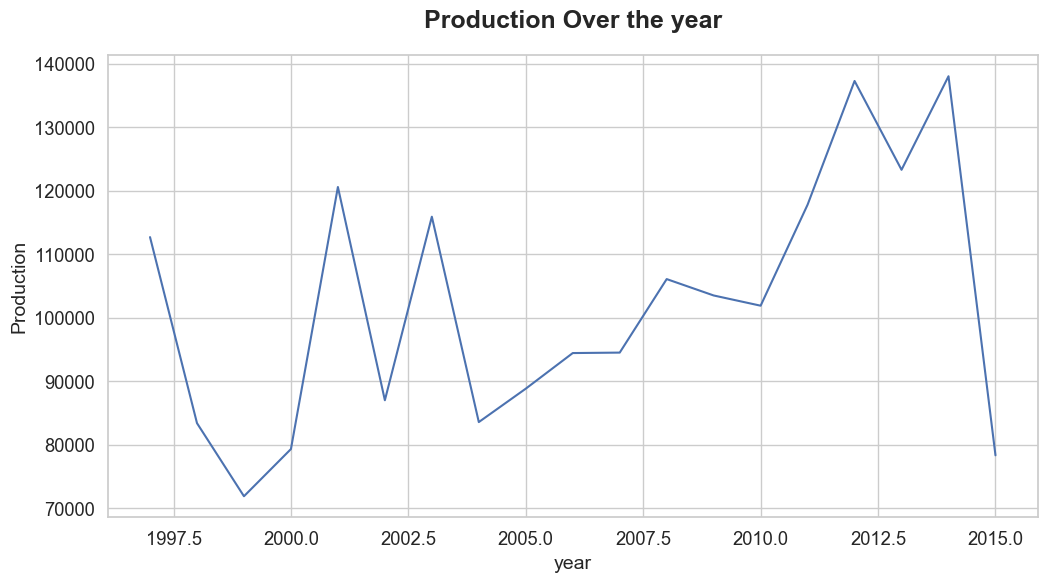

In [18]:
count_1('year')

C:\Users\U-ser\AppData\Local\Temp\ipykernel_23300\542182250.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=cols, y='production', data=df, ci=None)


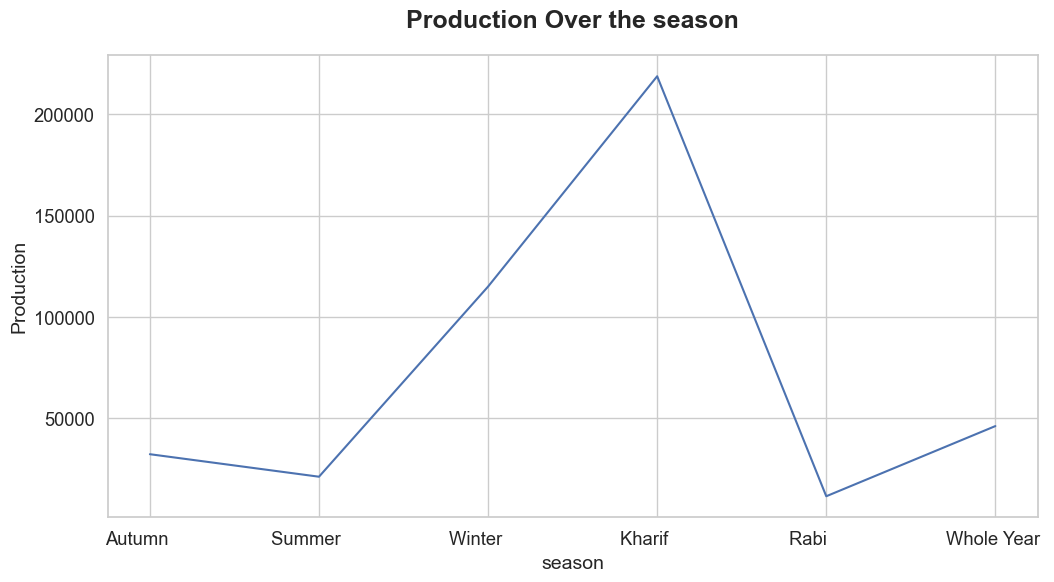

In [19]:
count_1('season')

C:\Users\U-ser\AppData\Local\Temp\ipykernel_23300\542182250.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=cols, y='production', data=df, ci=None)


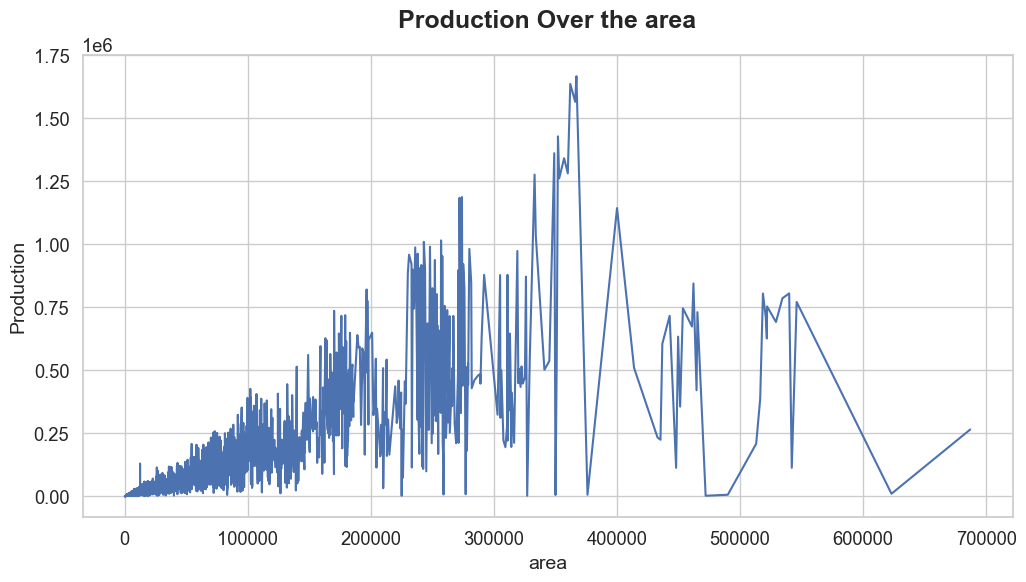

In [20]:
count_1('area')

C:\Users\U-ser\AppData\Local\Temp\ipykernel_23300\542182250.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=cols, y='production', data=df, ci=None)


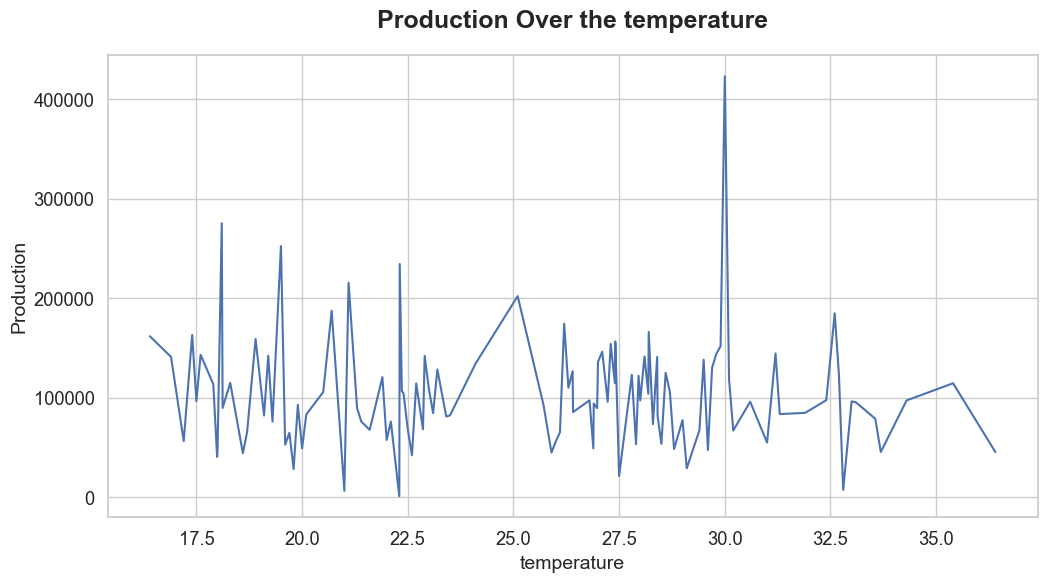

In [21]:
count_1('temperature')

C:\Users\U-ser\AppData\Local\Temp\ipykernel_23300\542182250.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=cols, y='production', data=df, ci=None)


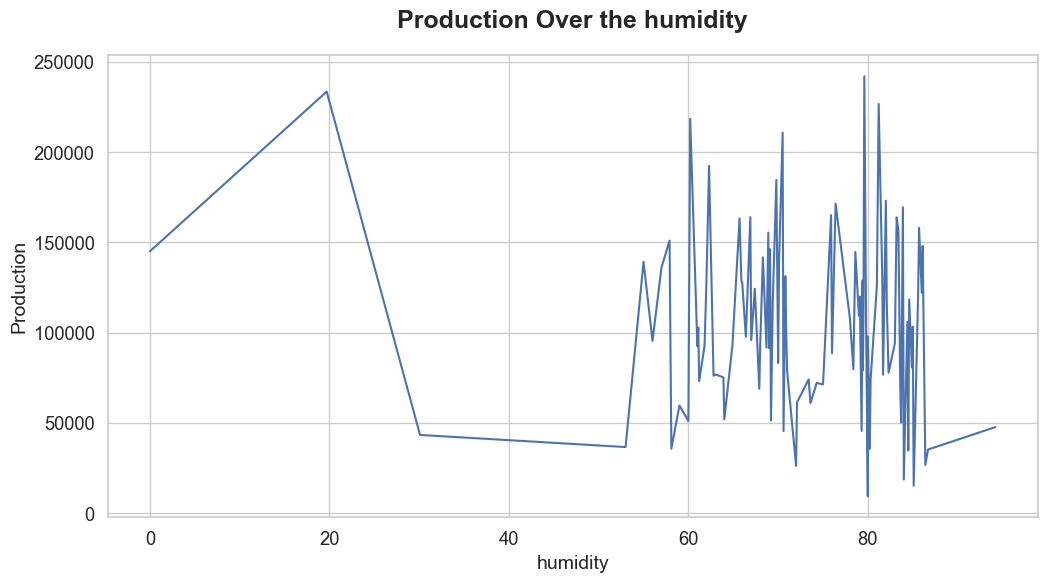

In [22]:
count_1('humidity')

C:\Users\U-ser\AppData\Local\Temp\ipykernel_23300\542182250.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=cols, y='production', data=df, ci=None)


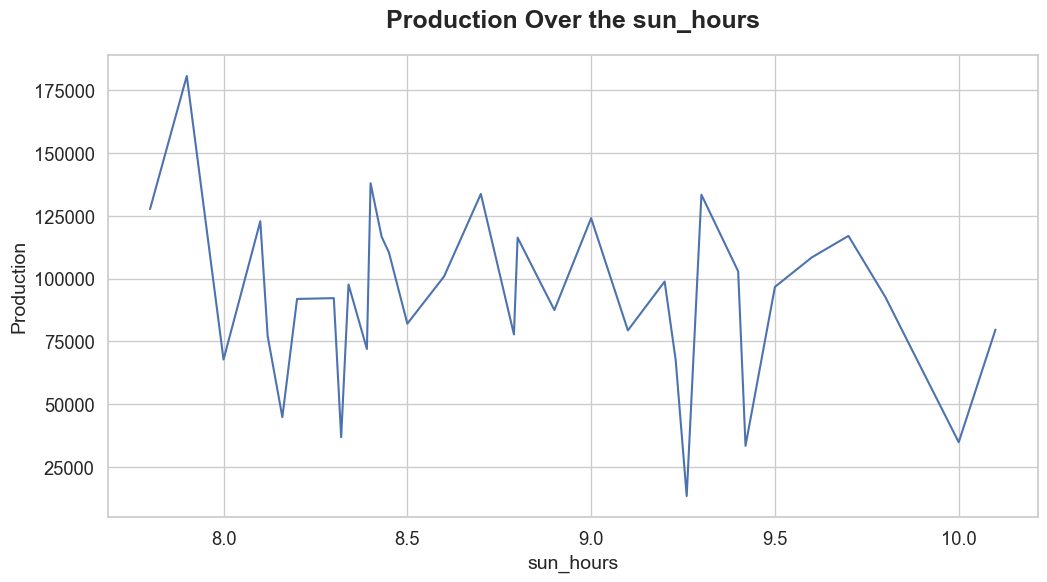

In [23]:
count_1('sun_hours')

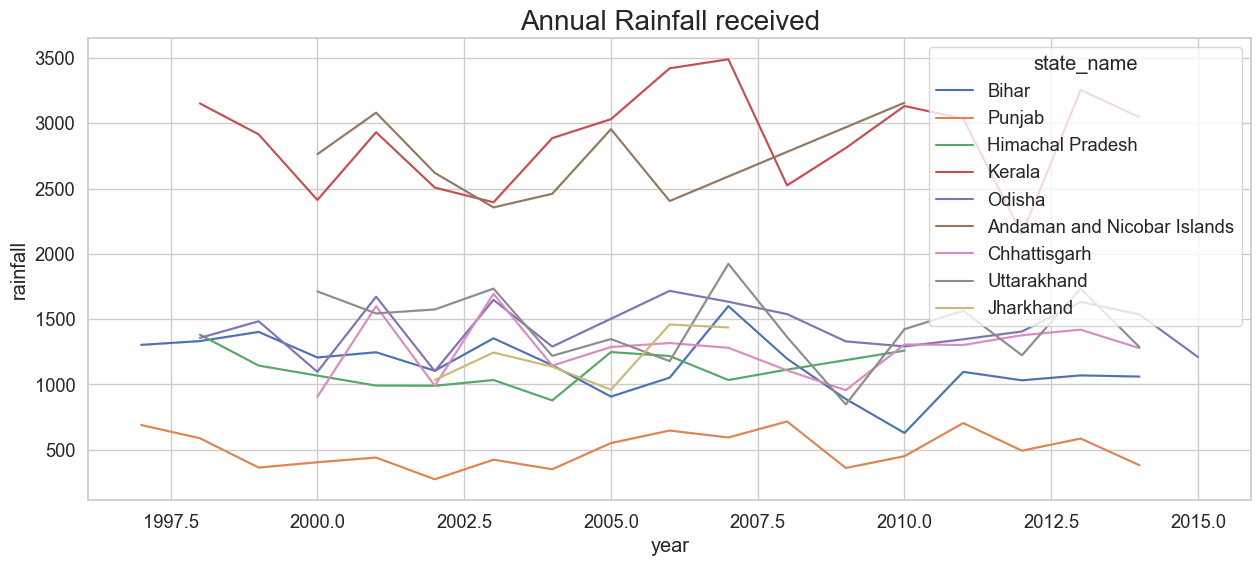

In [24]:
plt.figure(figsize=(15,6))
sns.lineplot(x = 'year', y= 'rainfall', hue = 'state_name', data = df)
plt.title('Annual Rainfall received',fontsize=20)
plt.show()

Text(0.5, 1.0, 'Highest Rainfall Year Data of States')

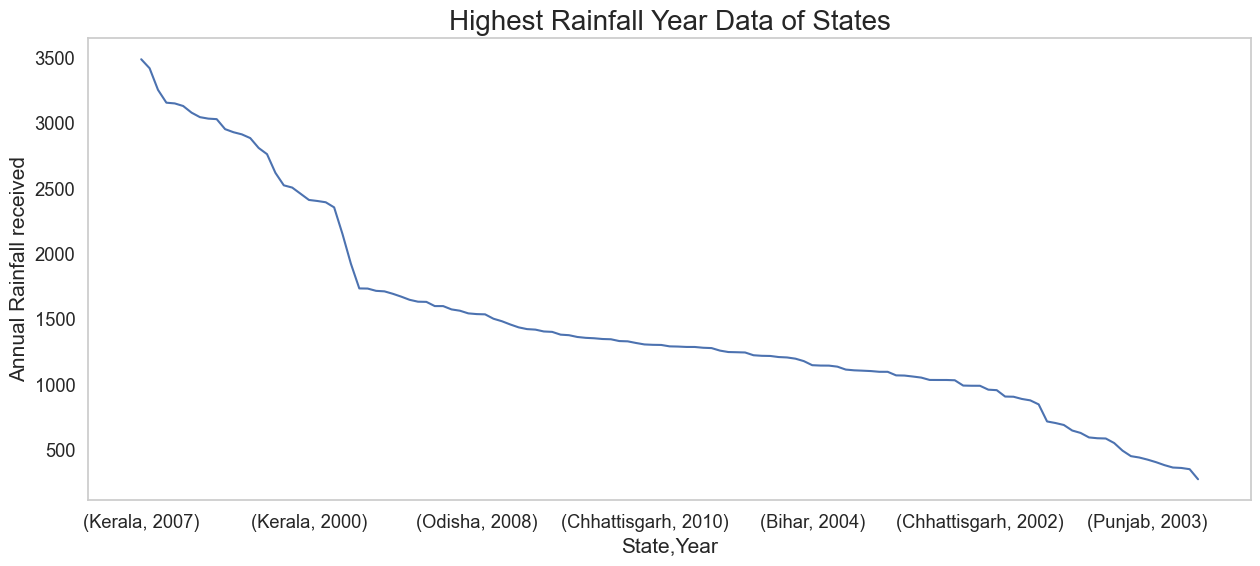

In [25]:
plt.figure(figsize=(15,6))
df.groupby(['state_name','year'])['rainfall'].mean().sort_values(ascending=False).plot()

plt.grid()
plt.xlabel("State,Year",fontsize=15)
plt.ylabel("Annual Rainfall received",fontsize=15)
plt.title('Highest Rainfall Year Data of States',fontsize=20)

Text(0.5, 1.0, 'Highest Rainfall Year of States')

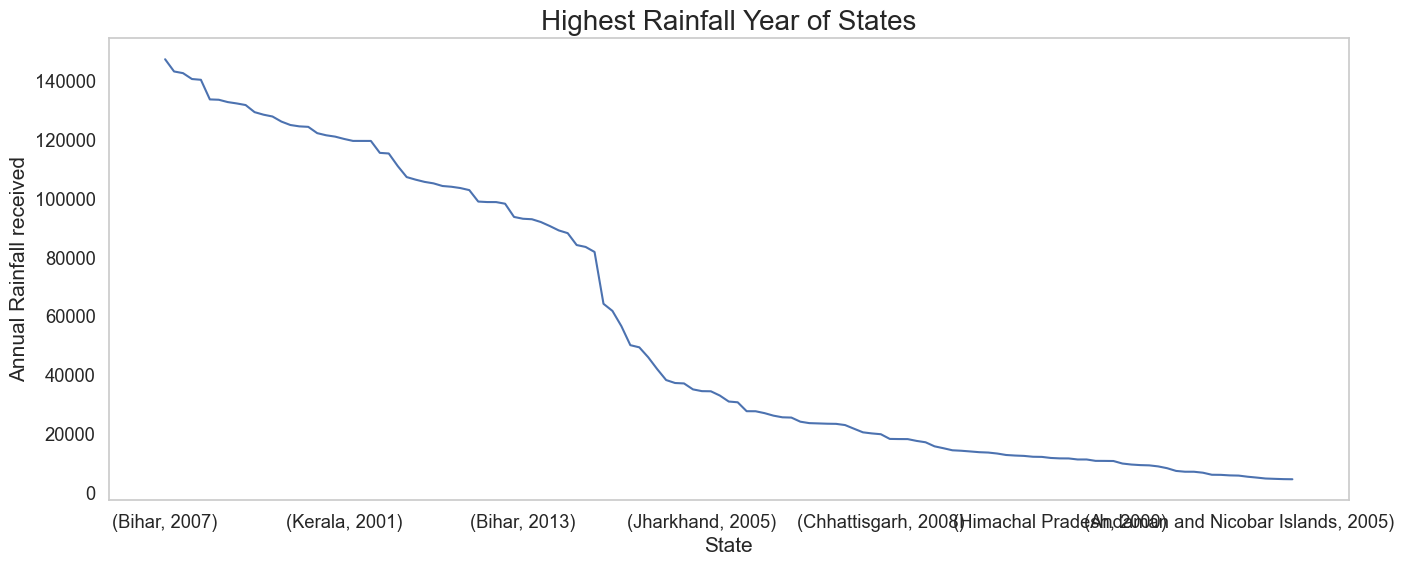

In [26]:
plt.figure(figsize=(16,6))
df.groupby(['state_name', 'year'])['rainfall'].sum().sort_values(ascending=False).plot()

plt.grid()
plt.xlabel("State",fontsize=15)
plt.ylabel("Annual Rainfall received",fontsize=15)
plt.title('Highest Rainfall Year of States',fontsize=20)

C:\Users\U-ser\AppData\Local\Temp\ipykernel_23300\4046326946.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("year").mean()['rainfall'].plot(ylim=(1000,2000),color='k',marker='o',markerfacecolor='red',linestyle='-',linewidth=2,figsize=(16,6))


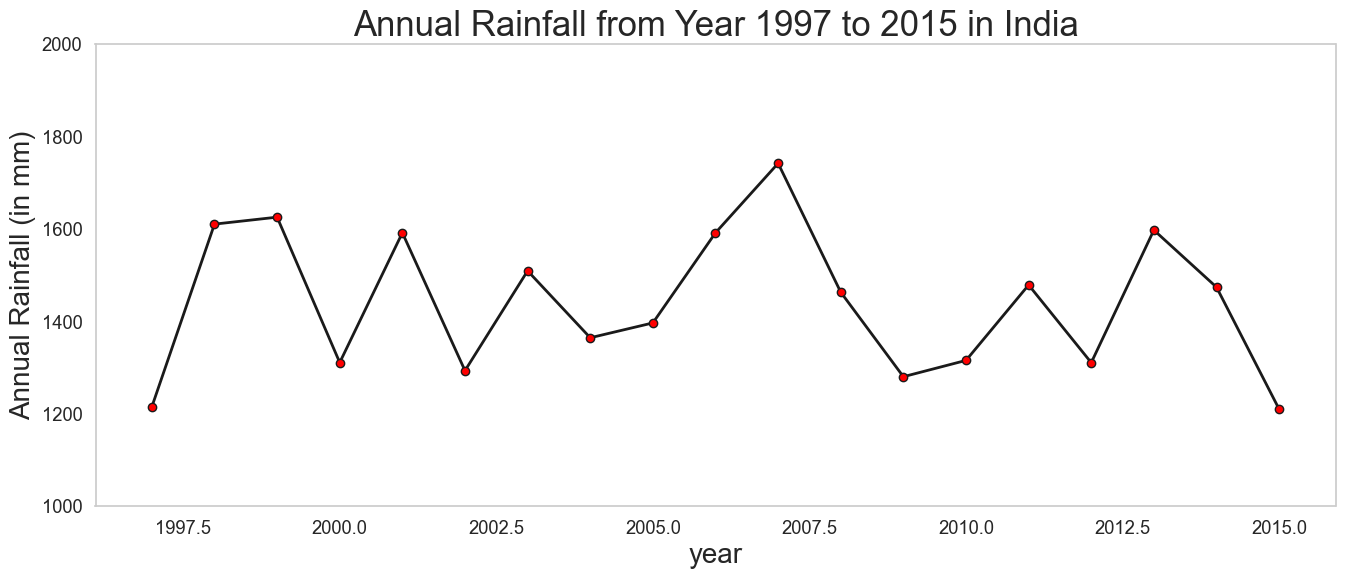

In [27]:
# Visualizing annual rainfall over the years(1997-2015) in India
df.groupby("year").mean()['rainfall'].plot(ylim=(1000,2000),color='k',marker='o',markerfacecolor='red',linestyle='-',linewidth=2,figsize=(16,6))
plt.xlabel('year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall from Year 1997 to 2015 in India',fontsize=25)

plt.grid()

### 5. Data Pre-Processing

#### 5.1. Handling with missing values

In [28]:
df.isnull().sum()

state_name         0
district_name      0
year               0
season             0
area               0
production        10
rainfall           0
temperature      163
humidity          66
sun_hours         47
dtype: int64

In [29]:
# Find and print columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
missing_columns

['production', 'temperature', 'humidity', 'sun_hours']

In [30]:
# count the number of rows with at least one missing value
missing_rows = df.isna().any(axis=1).sum()

# count the number of rows without missing values
non_missing_rows = len(df) - missing_rows

In [31]:
print(f'Missing rows: {missing_rows}')
print(f'Non-Missing values: {non_missing_rows}')

Missing rows: 267
Non-Missing values: 4631


In [32]:
percentage_missing_values = missing_rows / len(df) * 100
print(f"Percentage of missing values with respect to the whole data set: {percentage_missing_values} %")

Percentage of missing values with respect to the whole data set: 5.451204573295223 %


**Only 5.451% of our entire datasset contains missing values....**

In [33]:
# plot the results as a pie chart
labels = ['Rows with missing values', 'Rows without missing values']
sizes = [missing_rows, non_missing_rows]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

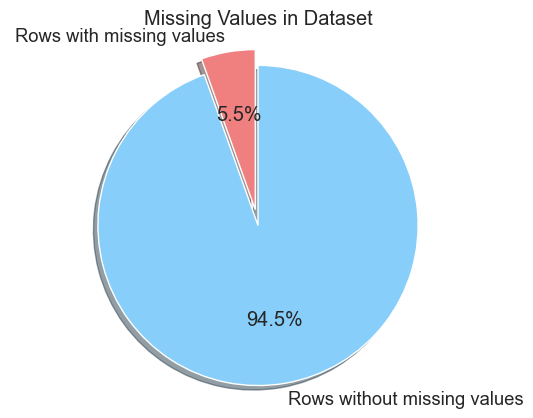

In [34]:
def missing_value():
        plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
        plt.axis('equal')
        plt.title('Missing Values in Dataset')
        plt.show()
missing_value()

In this case we can't just simply drop the null value like usual, It might affect the data, Choosing Imputing missling values would be a good choice in this scenario.

In [35]:
# Columns to impute
columns_to_impute = ['production', 'temperature', 'humidity', 'sun_hours']

# Applying median imputation
for column in columns_to_impute:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# Rechecking for missing values
missing_values_after_imputation = df.isnull().sum()

In [36]:
missing_values_after_imputation

state_name       0
district_name    0
year             0
season           0
area             0
production       0
rainfall         0
temperature      0
humidity         0
sun_hours        0
dtype: int64

#### 5.2. Handling with  Outliers

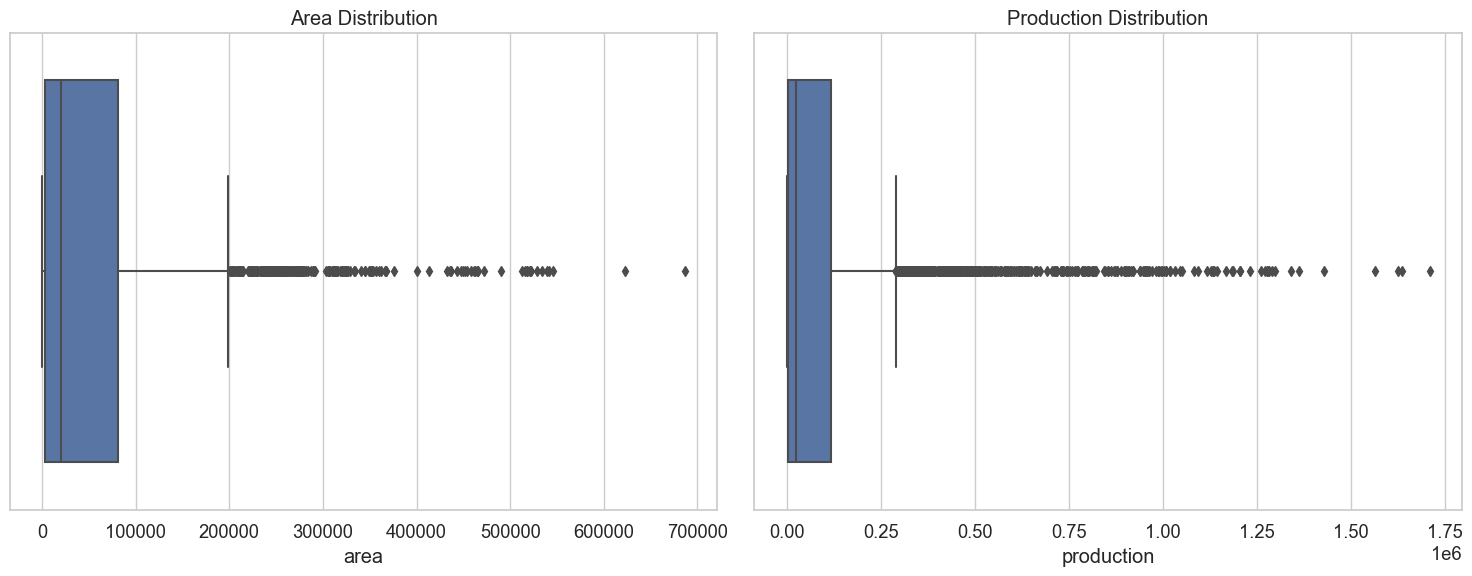

In [37]:
def Visualizing_outlier():
    # Visualizing distributions of numerical variables
    plt.figure(figsize=(15, 6))

    # Area distribution
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df['area'])
    plt.title('Area Distribution')

    # Production distribution
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['production'])
    plt.title('Production Distribution')

    plt.tight_layout()
    plt.show()
Visualizing_outlier()

In [38]:
def detect_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    return outliers

# Detecting outliers in the 'Area' and 'Production' columns
outliers_area = detect_outliers_iqr(df, 'area')
outliers_production = detect_outliers_iqr(df, 'production')

# Count of outliers in each column
outliers_count = {
    'Area_Outliers_Count': outliers_area.shape[0],
    'Production_Outliers_Count': outliers_production.shape[0]
}

In [39]:
outliers_count, outliers_area.head(), outliers_production.head()

({'Area_Outliers_Count': 304, 'Production_Outliers_Count': 507},
     state_name district_name  year       season      area  production  \
 76       Bihar        ROHTAS  1997  Winter       203149.0    360295.0   
 101     Punjab      AMRITSAR  1997  Kharif       292000.0    879000.0   
 105     Punjab     FIROZEPUR  1997  Kharif       252000.0    910000.0   
 110     Punjab      LUDHIANA  1997  Kharif       234000.0    899000.0   
 115     Punjab       PATIALA  1997  Kharif       240000.0    792000.0   
 
      rainfall  temperature  humidity  sun_hours  
 76     1303.7         22.9      68.0        9.2  
 101     690.1         21.6      69.0        9.0  
 105     690.1         21.6      69.0        9.0  
 110     690.1         29.9      67.0        9.4  
 115     690.1         26.2      79.8        8.9  ,
     state_name    district_name  year       season      area  production  \
 4        Bihar       AURANGABAD  1997  Winter       185191.0    382670.0   
 76       Bihar           RO

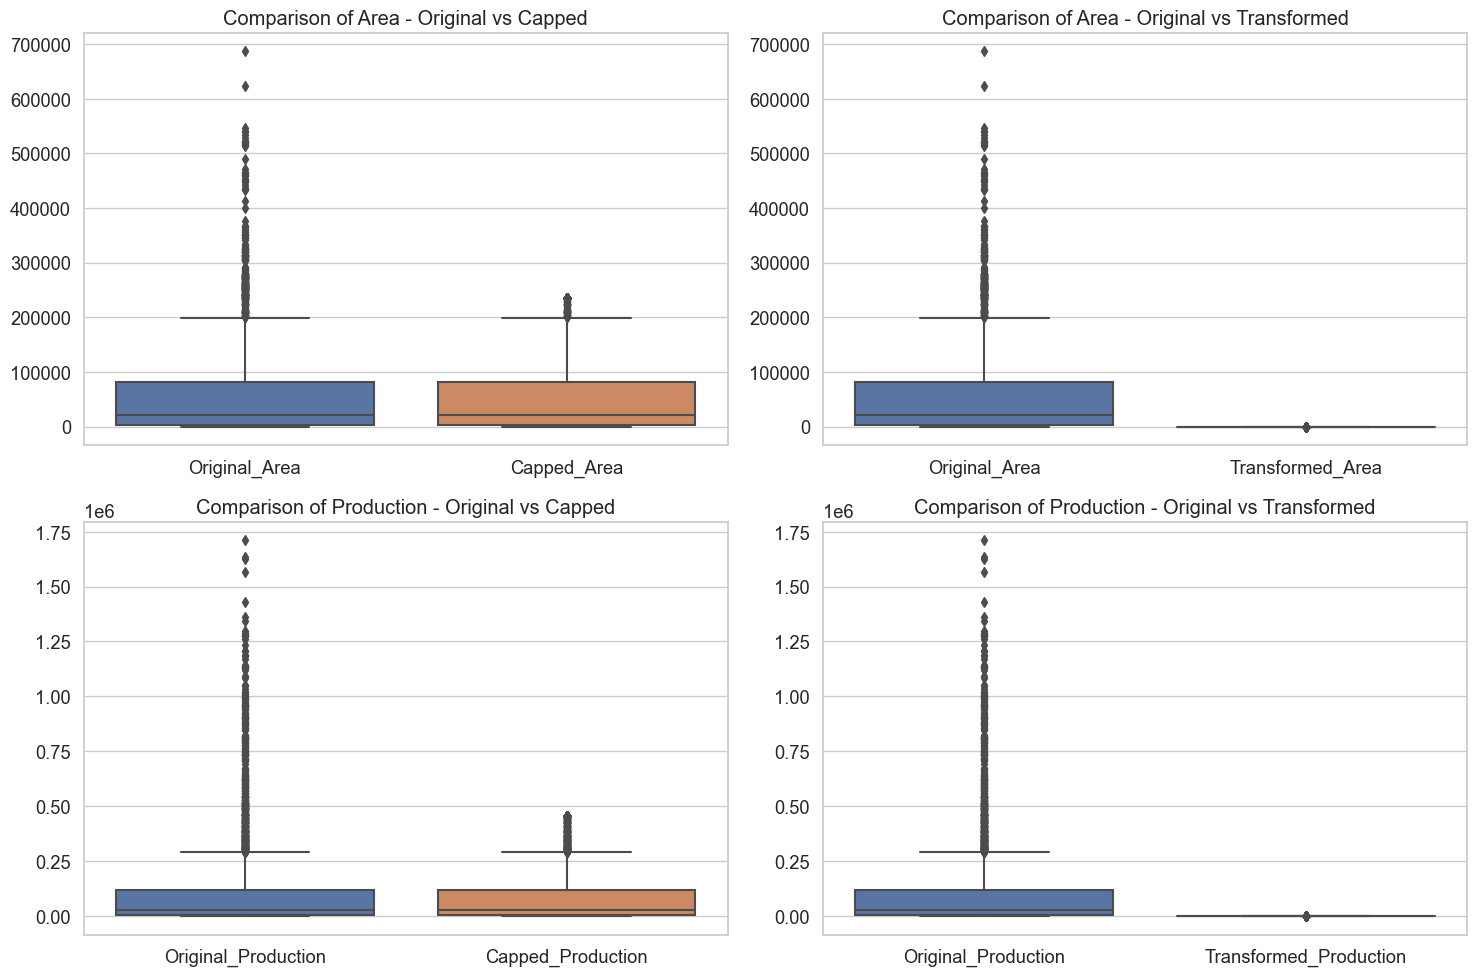

,Original_Area,Capped_Area,Transformed_Area,Original_Production,Capped_Production,Transformed_Production
0,17876.0,17876.0,9.791270,21397.0,21397.0,9.971053
1,8479.0,8479.0,9.045466,13993.0,13993.0,9.546384
2,93975.0,93975.0,11.450795,121063.0,121063.0,11.704075
3,10.0,83.0,2.397895,19.0,151.0,2.995732
4,185191.0,185191.0,12.129148,382670.0,382670.0,12.854931


In [42]:
# Capping (Winsorizing) Outliers
# Setting the limits to 5th and 95th percentile for both columns
capped_area = winsorize(df['area'], limits=[0.05, 0.05])
capped_production = winsorize(df['production'], limits=[0.05, 0.05])

# Transforming Outliers using Log Transformation
# Adding a small constant to avoid log(0) which is undefined
transformed_area = np.log(df['area'] + 1)
transformed_production = np.log(df['production'] + 1)

# Creating a new DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original_Area': df['area'],
    'Capped_Area': capped_area,
    'Transformed_Area': transformed_area,
    'Original_Production': df['production'],
    'Capped_Production': capped_production,
    'Transformed_Production': transformed_production
})

# Comparing the effect of both methods on Area and Production
plt.figure(figsize=(15, 10))

# Area Comparison
plt.subplot(2, 2, 1)
sns.boxplot(data=comparison_df[['Original_Area', 'Capped_Area']])
plt.title('Comparison of Area - Original vs Capped')

plt.subplot(2, 2, 2)    
sns.boxplot(data=comparison_df[['Original_Area', 'Transformed_Area']])
plt.title('Comparison of Area - Original vs Transformed')

# Production ComparisonF
plt.subplot(2, 2, 3)
sns.boxplot(data=comparison_df[['Original_Production', 'Capped_Production']])
plt.title('Comparison of Production - Original vs Capped')

plt.subplot(2, 2, 4)
sns.boxplot(data=comparison_df[['Original_Production', 'Transformed_Production']])
plt.title('Comparison of Production - Original vs Transformed')

plt.tight_layout()
plt.show()

# Returning the comparison DataFrame for further analysis if needed
comparison_df.head()

<b>FYI</b>:How Capping works,  Capping outliers at a certain percentile. For example, values above the 95th percentile and below the 5th percentile can be capped.

After comparison of these two techniques, We can see that <b>Capping</b> technique shows better performance on handling outlier without losing its value of the dataset and reduced outliers to a certain point.

In [43]:
# Replace the original columns with the capped versions
df['area'] = capped_area
df['production'] = capped_production

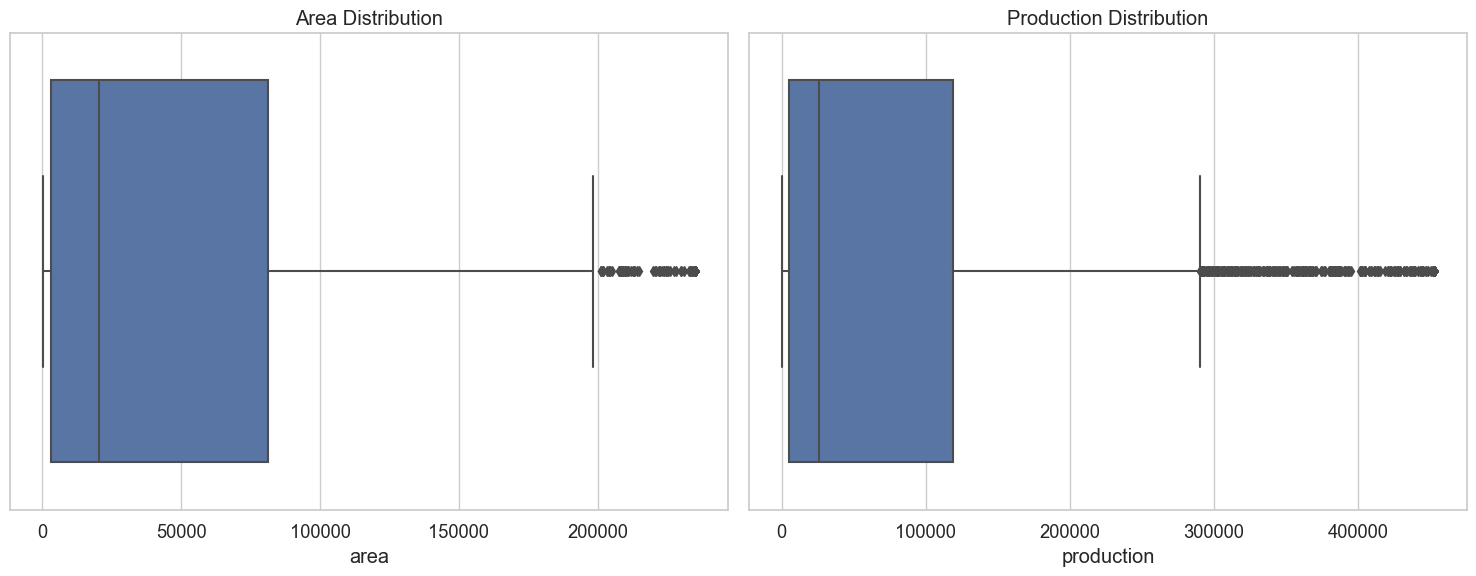

In [44]:
def numberical_feature():
    # Visualizing distributions of numerical variables
    plt.figure(figsize=(15, 6))

    # Area distribution
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df['area'])
    plt.title('Area Distribution')

    # Production distribution
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['production'])
    plt.title('Production Distribution')

    plt.tight_layout()
    plt.show()
numberical_feature()

#### 5.3. Handling with Imbalanced Data using Resampling Technique

In [45]:
# Checking for imbalance in categorical variables
categorical_columns = ['state_name', 'district_name', 'season']

# Getting the value counts for each categorical column
imbalance_check = {col: df[col].value_counts() for col in categorical_columns}

imbalance_check['state_name'].head(), imbalance_check['district_name'].head(), imbalance_check['season'].head()

(Bihar           1602
 Odisha          1346
 Kerala           695
 Punjab           338
 Chhattisgarh     294
 Name: state_name, dtype: int64,
 SUPAUL      53
 ARARIA      52
 PURNIA      52
 SAHARSA     52
 VAISHALI    52
 Name: district_name, dtype: int64,
 Kharif         1342
 Winter         1278
 Autumn         1182
 Summer         1065
 Rabi             18
 Name: season, dtype: int64)

For <b>categorical variables</b> like season, where the imbalance is not extreme (except for 'Rabi'), a combination of oversampling the minority class ('Rabi') and undersampling the majority classes ('Kharif', 'Winter', 'Autumn') could be effective. This would balance the dataset without losing much valuable information.
For <b>state_name and district_name</b>, since the number of unique categories is large and the distribution is more varied, oversampling minor categories might introduce too much synthetic variance. Therefore, a cautious approach to resampling, focusing on moderately represented categories, would be beneficial.

In [46]:
# Trimming trailing spaces from the 'season' column
df['season'] = df['season'].str.strip()

# Redefining the datasets by season after trimming spaces
df_kharif = df[df['season'] == 'Kharif']
df_winter = df[df['season'] == 'Winter']
df_autumn = df[df['season'] == 'Autumn']
df_summer = df[df['season'] == 'Summer']
df_rabi = df[df['season'] == 'Rabi']
df_whole_year = df[df['season'] == 'Whole Year']  # Including 'Whole Year' season

# Finding the number of samples in the 'Summer' season (next smallest class)
summer_size = df['season'].value_counts()['Summer']

# Upsampling 'Rabi' and downsampling other seasons to the size of 'Summer'
df_kharif_resampled = resample(df_kharif, replace=False, n_samples=summer_size, random_state=123)
df_winter_resampled = resample(df_winter, replace=False, n_samples=summer_size, random_state=123)
df_autumn_resampled = resample(df_autumn, replace=False, n_samples=summer_size, random_state=123)
df_summer_resampled = df_summer.copy()  # No need to resample
df_rabi_resampled = resample(df_rabi, replace=True, n_samples=summer_size, random_state=123)
df_whole_year_resampled = resample(df_whole_year, replace=True, n_samples=summer_size, random_state=123)

# Combining the resampled dataframes
resampled_df = pd.concat([df_kharif_resampled, df_winter_resampled, df_autumn_resampled, 
                          df_summer_resampled, df_rabi_resampled, df_whole_year_resampled])

# Checking the balance in the 'season' variable after resampling
season_balance_check = resampled_df['season'].value_counts()
season_balance_check

Kharif        1065
Winter        1065
Autumn        1065
Summer        1065
Rabi          1065
Whole Year    1065
Name: season, dtype: int64

<b>Upsample 'Rabi' Season</b>: Since 'Rabi' has very few samples, we'll upsample it to a reasonable number, closer to the count of the 'Summer' season, which is the next smallest class.

<b>Downsample Other Seasons</b>: We'll downsample the 'Kharif', 'Winter', and 'Autumn' seasons to match the count of the 'Summer' season.

In [47]:
X = resampled_df.drop(['state_name', 'district_name', 'production'], axis=1)
y = resampled_df['production']

# Preprocessing - OneHotEncoding for categorical variable 'season'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['season'])
    ], remainder='passthrough')

# Creating a pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model_pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1048402200.6646684, 0.9212700397055525)

In [48]:
resampled_df.columns

Index(['state_name', 'district_name', 'year', 'season', 'area', 'production',
       'rainfall', 'temperature', 'humidity', 'sun_hours'],
      dtype='object')

In [49]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6390 entries, 2224 to 4800
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state_name     6390 non-null   object 
 1   district_name  6390 non-null   object 
 2   year           6390 non-null   int64  
 3   season         6390 non-null   object 
 4   area           6390 non-null   float64
 5   production     6390 non-null   float64
 6   rainfall       6390 non-null   float64
 7   temperature    6390 non-null   float64
 8   humidity       6390 non-null   float64
 9   sun_hours      6390 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 549.1+ KB


### 6. Model Building

In [50]:
# Selecting features and target variable
X = resampled_df.drop(['state_name', 'district_name', 'production'], axis=1)
y = resampled_df['production']

In [51]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 6.1. Random Forest


In [52]:
# Training the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['season'])])),
                ('regressor', RandomForestRegressor())])

In [53]:
# Predicting on the test set
y_pred = model_pipeline.predict(X_test)

In [54]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1058269252.1948857, 0.9205290716164883)

In [55]:
numerical_imputer = SimpleImputer(strategy='median')

In [56]:
# Evaluating the model on the training set
y_train_pred = model_pipeline.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Performing cross-validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='r2')

# Average R-squared from cross-validation
cv_r2_mean = np.mean(cv_scores)


print("MSE Train:",mse_train)
print("R2 Train:",r2_train)
print("MSE:",mse)
print("R2:",r2)
print("CV_R2:",cv_r2_mean)

c:\Users\U-ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\U-ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\U-ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\U-ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\Users\U-ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
 

MSE Train: 191160634.6646463
R2 Train: 0.9845280836171268
MSE: 1058269252.1948857
R2: 0.9205290716164883
CV_R2: nan


c:\Users\U-ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\U-ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\U-ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\U-ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\Users\U-ser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 480, in predict
    Xt = transform.transform(Xt)
 

In [57]:
# Updating the preprocessor to handle the 'Whole Year' category
# OneHotEncoding all unique categories in the 'season' column
all_seasons = df['season'].unique()
onehot_encoder = OneHotEncoder(categories=[all_seasons])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehot_encoder, ['season']),
        ('num', numerical_imputer, ['year', 'area', 'rainfall', 'temperature', 'humidity', 'sun_hours'])
    ])

# Updating the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Retraining the model with the updated pipeline
model_pipeline.fit(X_train, y_train)

# Re-performing cross-validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='r2')
cv_r2_mean = np.mean(cv_scores)

# Re-evaluating the model on training and testing sets
y_train_pred = model_pipeline.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE Train:",mse_train)
print("R2 Train:",r2_train)
print("MSE:",mse)
print("R2:",r2)
print("CV_R2:",cv_r2_mean)

MSE Train: 190515854.60260868
R2 Train: 0.9845802700059338
MSE: 1062496640.1285216
R2: 0.9202116151251214
CV_R2: 0.6996808292156219


In [58]:
# Parameters to tune
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Creating a new grid search with cross-validation
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Execute the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(categories=[array(['Autumn', 'Summer', 'Winter', 'Kharif', 'Rabi', 'Whole Year'],
      dtype=object)]),
                                                                         ['season']),
                                                                        ('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['year',
                                                                          'area',
                                                                          'rainfall',
                                                                          'temperature',
                                                                          'humidity',
                                                                          'sun_hours'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]},
             scoring='r2')

In [59]:
grid_search.best_params_

{'regressor__max_depth': None,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 10,
 'regressor__n_estimators': 100}

In [60]:
grid_search.best_score_

0.9095482221421374

In [61]:
rf_model = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42  # for reproducibility
)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluating the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print out the performance metrics
print(f"Training R²: {r2_train}, Testing R²: {r2_test}")
print(f"Training MSE: {mse_train}, Testing MSE: {mse_test}")

ValueError: could not convert string to float: 'Whole Year'

In [ ]:
X_train.info()

The model's R-squared score is higher on the training set compared to the testing set, which may indicate some degree of overfitting, So We will try different approach.

#### 6.2. XGBoost Model

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [1, 1.1, 1.2]
}

# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, 
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
best_parameters

In [ ]:
best_score

In [ ]:
# Using the best parameters obtained from GridSearchCV for XGBoost
best_params = {
    'colsample_bytree': 0.8,
    'gamma': 0,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 300,
    'reg_alpha': 0.1,
    'reg_lambda': 1.2,
    'subsample': 0.8
}

# Train the XGBoost model with these parameters
xgb_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror')

# Fitting the model
xgb_model.fit(X_train, y_train)

# Making predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluating the model
r2_train_xgb = r2_score(y_train, y_train_pred)
r2_test_xgb = r2_score(y_test, y_test_pred)
mse_train_xgb = mean_squared_error(y_train, y_train_pred)
mse_test_xgb = mean_squared_error(y_test, y_test_pred)

# Print out the performance metrics
print(f"Training R²: {r2_train_xgb}, Testing R²: {r2_test_xgb}")
print(f"Training MSE: {mse_train_xgb}, Testing MSE: {mse_test_xgb}")

The R-squared from training set is still larger than test set but its performance is better than RandomForest's, We will try to change the parameter for better performance.

In [ ]:
xgb_model_adjusted = xgb.XGBRegressor(
    colsample_bytree=0.8,
    gamma=0.1,  # Slightly increased
    learning_rate=0.05,  # Decreased
    max_depth=3,  # Keeping it the same as before
    n_estimators=500,  # Increased
    reg_alpha=0.2,  # Slightly increased
    reg_lambda=1.3,  # Slightly increased
    subsample=0.8,
    objective='reg:squarederror'
)

xgb_model_adjusted.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

# Evaluating the adjusted model
y_train_pred_adjusted = xgb_model_adjusted.predict(X_train)
y_test_pred_adjusted = xgb_model_adjusted.predict(X_test)

r2_train_adjusted = r2_score(y_train, y_train_pred_adjusted)
r2_test_adjusted = r2_score(y_test, y_test_pred_adjusted)
mse_train_adjusted = mean_squared_error(y_train, y_train_pred_adjusted)
mse_test_adjusted = mean_squared_error(y_test, y_test_pred_adjusted)

# Print out the performance metrics
print(f"Training R²: {r2_train_adjusted}, Testing R²: {r2_test_adjusted}")
print(f"Training MSE: {mse_train_adjusted}, Testing MSE: {mse_test_adjusted}")

In [ ]:
xgb_model_fine_tuned = xgb.XGBRegressor(
    colsample_bytree=0.7,  # Slightly reduced
    gamma=0.2,             # Increased
    learning_rate=0.05,    # Kept the same
    max_depth=2,           # Further reduced
    n_estimators=500,      # Kept the same
    reg_alpha=0.2,         # Kept the same
    reg_lambda=1.3,        # Kept the same
    subsample=0.7,         # Slightly reduced
    objective='reg:squarederror'
)

xgb_model_fine_tuned.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

# Evaluating the fine-tuned model
y_train_pred_fine_tuned = xgb_model_fine_tuned.predict(X_train)
y_test_pred_fine_tuned = xgb_model_fine_tuned.predict(X_test)

r2_train_fine_tuned = r2_score(y_train, y_train_pred_fine_tuned)
r2_test_fine_tuned = r2_score(y_test, y_test_pred_fine_tuned)
mse_train_fine_tuned = mean_squared_error(y_train, y_train_pred_fine_tuned)
mse_test_fine_tuned = mean_squared_error(y_test, y_test_pred_fine_tuned)

# Print out the performance metrics
print(f"Training R²: {r2_train_fine_tuned}, Testing R²: {r2_test_fine_tuned}")
print(f"Training MSE: {mse_train_fine_tuned}, Testing MSE: {mse_test_fine_tuned}")

The final result from Fine-tuned XGBoost model show a further reduction in overfitting, indicated by the narrower gap between the training and testing R² scores and MSE values. Eventhough the performance of training data is still better than testing data which is acceptable.

In [ ]:
# 1. Generate Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# 2. Calculate Residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# 3. Perform Residual Analysis
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_train, kde=True)
plt.title("Training Set Residuals")

plt.subplot(1, 2, 2)
sns.histplot(residuals_test, kde=True)
plt.title("Testing Set Residuals")

plt.show()

# 4. Feature Importance Analysis
importance = xgb_model.feature_importances_

feature_names = X_train.columns
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importances")
plt.show()

Both the training and testing set residuals are centered around zero and have a similar distribution, which means our model is good to go for further analysis, There's no bias or skewd the the left or right, So we will decided to choose XGBoost Model.